In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import display
import phik
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns
import gc

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dseb-64-data-preparation-final-project/dseb63_columns_description.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_sample_submission.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_previous_application.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_bureau_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_POS_CASH_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_installments_payments.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_p

**application_{train|test}.csv**

In [2]:
application_train = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv')
print('application_train data shape: ', application_train.shape)
application_train.head()

application_train data shape:  (246009, 123)


,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,NaN,NaN,NaN,

In [3]:
print('-'*80)
print(f'The shape of dseb63_application_train.csv is: {application_train.shape}')
print('-'*80)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of dseb63_application_train.csv is: (246009, 123)
--------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
--------------------------------------------------------------------------------


In [4]:
application_test = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_test.csv')
print('application_test data shape: ', application_test.shape)
application_test.head()

application_test data shape:  (61502, 122)


,Unnamed: 0,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,...,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,0.0690,...,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,Working,Secondary / secondary special,S

In [5]:
print('-'*80)
print(f'The shape of dseb63_application_test.csv is: {application_test.shape}')
print('-'*80)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of dseb63_application_test.csv is: (61502, 122)
--------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
--------------------------------------------------------------------------------


# 1. Data overview

In [6]:
pos_cash = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_POS_CASH_balance.csv')
print('POS cash balance data shape: ', pos_cash.shape)
pos_cash.head()

POS cash balance data shape:  (8543375, 8)


,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [7]:
column_to_move = 'SK_ID_CURR'

# Reorder columns with the column to move in the second position
columns_reordered = pos_cash.columns.tolist()  # Get all columns as a list
columns_reordered.remove(column_to_move)       # Remove the column to move
columns_reordered.insert(1, column_to_move)    # Insert it into the second position

# Update the DataFrame with the reordered columns
pos_cash = pos_cash[columns_reordered]

# Display the updated DataFrame
pos_cash.head()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,185279,-31,48.0,45.0,Active,0,0
1,1803195,185279,-17,48.0,31.0,Active,0,0
2,1803195,185279,-21,48.0,35.0,Active,0,0
3,1803195,185279,-8,48.0,21.0,Active,0,0
4,1803195,185279,-4,48.0,17.0,Active,0,0


In [8]:
pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [9]:
pos_cash.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,8543375.0,1.903489e+06,535938.725528,1000001.0,1434475.0,1896878.0,2369096.0,2843499.0
SK_ID_CURR,8543375.0,1.535356e+05,88716.609408,0.0,76622.0,153315.0,230293.0,307510.0
MONTHS_BALANCE,8543375.0,-3.494812e+01,26.053718,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,8521512.0,1.703348e+01,12.004305,1.0,10.0,12.0,24.0,84.0
CNT_INSTALMENT_FUTURE,8521497.0,1.046808e+01,11.144076,0.0,3.0,7.0,14.0,84.0
SK_DPD,8543375.0,1.190473e+01,134.030213,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,8543375.0,5.835209e-01,30.421100,0.0,0.0,0.0,0.0,3373.0


In [10]:
print(f'The shape of POS_CASH_balance.csv is: {pos_cash.shape}')
print('-'*80)
print(f'Number of unique SK_ID_PREV in dseb63_POS_CASH_balance.csv are: {len(pos_cash.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in dseb63_POS_CASH_balance.csv are: {len(pos_cash.SK_ID_CURR.unique())}')
print('-'*80)
print(f'Number of overlapping SK_ID_CURR in dseb63_application_train.csv and POS_CASH_balance.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(pos_cash.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in dseb63_application_test.csv and POS_CASH_balance.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(pos_cash.SK_ID_CURR.unique())))}')
print('-'*80)
print(f'Number of duplicate values in POS_CASH_balance: {pos_cash.shape[0] - pos_cash.duplicated().shape[0]}')

The shape of POS_CASH_balance.csv is: (8543375, 8)
--------------------------------------------------------------------------------
Number of unique SK_ID_PREV in dseb63_POS_CASH_balance.csv are: 800337
Number of unique SK_ID_CURR in dseb63_POS_CASH_balance.csv are: 289444
--------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in dseb63_application_train.csv and POS_CASH_balance.csv are: 231531
Number of overlapping SK_ID_CURR in dseb63_application_test.csv and POS_CASH_balance.csv are: 57913
--------------------------------------------------------------------------------
Number of duplicate values in POS_CASH_balance: 0


# 2. Checking imbalance

The imbalance ratio (IR) is typically defined as:\
Imbalance Ratio = Number of samples in the majority class/ Number of samples in the minority class
* An imbalance ratio close to 1 indicates a balanced dataset (e.g., equal or nearly equal numbers of samples in each class).
* A low imbalance ratio (e.g., close to 0) indicates significant imbalance, meaning one class dominates the dataset.

In [11]:
"""
This file contains functions to calculate imbalance ratio of a dataset.

Functions:
    1. imbalance_col: function
        Function to create a dataframe of imbalance columns.
"""

def imbalance_col(data):
    """
    Function to create a dataframe of imbalance columns.

    Inputs:
        data: DataFrame
            The dataset for which to calculate imbalance ratios.

    Returns:
        DataFrame of imbalance columns and their respective imbalance ratios.
    """
    # Filter out columns containing '_ID_'
    relevant_columns = [col for col in data.columns if '_ID_' not in col]
    data = data[relevant_columns]

    imbalance_ratios = {}

    for col in data.columns:
        value_counts = data[col].value_counts()

        if data[col].dtype == 'object':
            # Categorical column imbalance ratio
            if len(value_counts) > 1:
                imbalance_ratios[col] = value_counts.min() / value_counts.max()
            else:
                imbalance_ratios[col] = None
        else:
            # Numerical column imbalance ratio for binary values (0 and 1)
            if set([0, 1]).issubset(value_counts.index):
                imbalance_ratios[col] = value_counts[1] / value_counts[0]
            else:
                imbalance_ratios[col] = None

    # Print imbalance ratios for all columns
    for col, ratio in imbalance_ratios.items():
        print(
            f"Imbalance Ratio for column '{col}': {f'{ratio:.4f}' if ratio is not None else 'None'}"
        )


    # Filter out columns with no valid imbalance ratio
    valid_ratios = {col: ratio for col, ratio in imbalance_ratios.items() if ratio is not None}

    if not valid_ratios:
        print("All columns do not have data to calculate the imbalance ratio.")
        return None

    # Find the column with the highest imbalance ratio
    max_imbalance_col = max(valid_ratios, key=valid_ratios.get)
    print(
        f"The column with the heaviest imbalance ratio is '{max_imbalance_col}' "
        f"with a ratio of {valid_ratios[max_imbalance_col]:.4f}"
    )

    # Return as a DataFrame for further use
    return pd.DataFrame.from_dict(valid_ratios, orient='index', columns=['Imbalance Ratio'])


In [12]:
imbalance_col(pos_cash)

Imbalance Ratio for column 'MONTHS_BALANCE': None
Imbalance Ratio for column 'CNT_INSTALMENT': None
Imbalance Ratio for column 'CNT_INSTALMENT_FUTURE': 0.4315
Imbalance Ratio for column 'NAME_CONTRACT_STATUS': 0.0000
Imbalance Ratio for column 'SK_DPD': 0.0023
Imbalance Ratio for column 'SK_DPD_DEF': 0.0023
The column with the heaviest imbalance ratio is 'CNT_INSTALMENT_FUTURE' with a ratio of 0.4315


,Imbalance Ratio
CNT_INSTALMENT_FUTURE,4.315269e-01
NAME_CONTRACT_STATUS,2.558010e-07
SK_DPD,2.274914e-03
SK_DPD_DEF,2.259522e-03


## Observations 1

- **MONTHS_BALANCE:** No significant imbalance detected in this feature.
- **CNT_INSTALMENT:** No noticeable imbalance found.
- **CNT_INSTALMENT_FUTURE:** Displays a moderate imbalance with a ratio of **0.4315**, suggesting some unevenness in class distribution.
- **NAME_CONTRACT_STATUS:** No class imbalance detected.
- **SK_DPD:** Shows a minor imbalance with a ratio of **0.0023**, indicating minimal disparity.
- **SK_DPD_DEF:** Similarly, a slight imbalance is observed with a ratio of **0.0023**.

**Conclusion:** While most features exhibit minimal or no imbalance, features with moderate imbalance (e.g., `CNT_INSTALMENT_FUTURE`) require attention to ensure balanced representation, especially in predictive modeling tasks.


# 3. Checking outliers

In [13]:
def plot_boxplots(data, numerical_columns):
    """
    Creates box plots for each numerical column to visualize outliers.

    Parameters:
        data (DataFrame): The input dataset.
        numerical_columns (list): List of numerical column names.
    """
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

def get_outliers(data, outlier_threshold=1.5):
    """
    Identifies rows containing outliers for numerical columns based on the IQR method.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Returns:
        DataFrame: Rows containing outliers for numerical columns.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Calculate Q1, Q3, and IQR for numerical columns
    q1 = data[numerical_columns].quantile(0.25)
    q3 = data[numerical_columns].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers using the IQR method
    outliers = ((data[numerical_columns] < (q1 - outlier_threshold * iqr)) |
                (data[numerical_columns] > (q3 + outlier_threshold * iqr)))

    return data[outliers.any(axis=1)]

def outlier(data, outlier_threshold=1.5):
    """
    Main function to visualize and identify outliers in the dataset.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Outputs:
        Prints a DataFrame containing rows with outliers.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Plot boxplots for numerical columns
    plot_boxplots(data, numerical_columns)

    # Get rows with outliers
    rows_with_outliers = get_outliers(data, outlier_threshold)
    print("Rows with outliers:")
    print(rows_with_outliers)

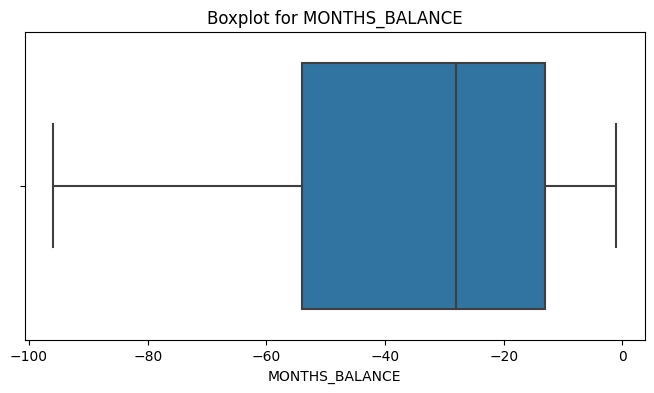

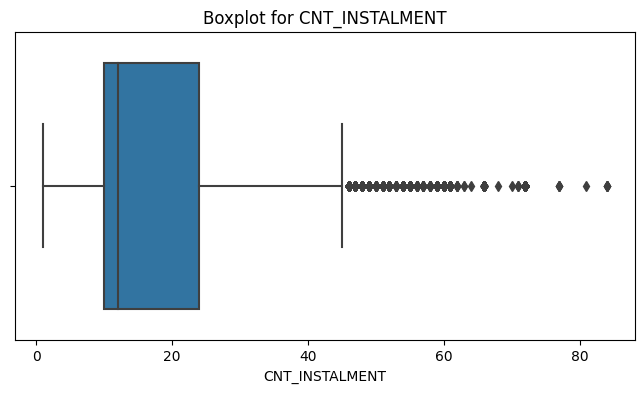

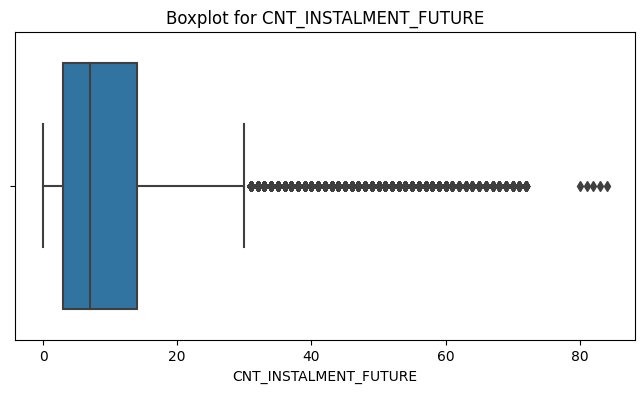

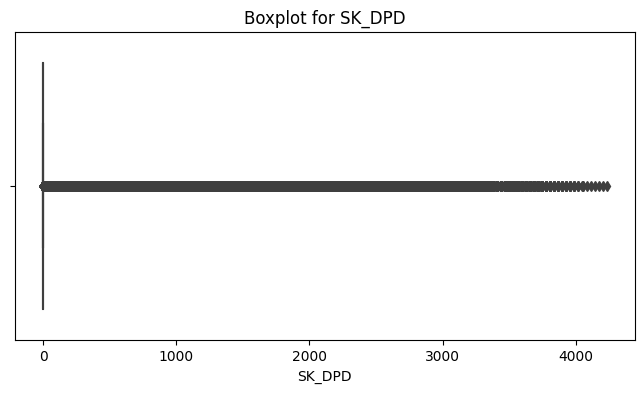

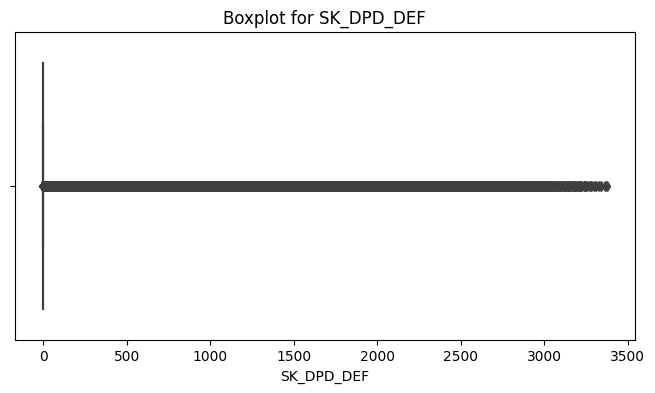

Rows with outliers:
         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0           1803195      185279             -31            48.0   
1           1803195      185279             -17            48.0   
2           1803195      185279             -21            48.0   
3           1803195      185279              -8            48.0   
4           1803195      185279              -4            48.0   
...             ...         ...             ...             ...   
8542912     1805978      214457             -94             8.0   
8542914     1805978      214457             -95             8.0   
8542915     1805978      214457             -96             8.0   
8542916     1805978      214457             -90             8.0   
8542951     2113552       50718              -3            12.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                         45.0               Active       0           0  
1                         3

In [14]:
outlier(pos_cash)

## Observations 2

- **MONTHS_BALANCE:** No clear evidence of outliers. A deeper analysis of the data distribution is recommended to detect any potential anomalies.
- **CNT_INSTALMENT:** Outlier information is not specified. Further investigation is necessary to identify and address possible outliers.
- **CNT_INSTALMENT_FUTURE:** No immediate outlier information. Additional examination is needed to confirm and handle any unusual values.
- **NAME_CONTRACT_STATUS:** Outlier detection is not applicable, as this column likely contains categorical data.
- **SK_DPD:** Potential outliers may exist, with high values such as **384**, **354**, and **505**. Detailed analysis is needed to confirm and manage these.
- **SK_DPD_DEF:** Similar to `SK_DPD`, high-value outliers might be present. Further analysis is required for confirmation.

**Recommendation:** For numeric columns such as `SK_DPD` and `SK_DPD_DEF`, a focused analysis using statistical methods (e.g., z-scores or IQR) is essential to address potential outliers. For categorical columns like `NAME_CONTRACT_STATUS`, consider examining for invalid or inconsistent entries instead of numeric outliers.


# 4.Checking missing values

In [15]:
def nan_percent(data):
    '''
    Function to create a dataframe of percentage of NaN values for each column of the dataframe

    Inputs:
        data (DataFrame): Input DataFrame

    Returns:
        DataFrame: A DataFrame containing the columns and their percentage of NaN values
    '''
    # Calculate the percentage of NaN values for each column
    nan_percentages = data.isnull().mean() * 100
    df_nan = nan_percentages.reset_index().rename(columns={0: 'Percentage_of_NaN', 'index': 'Column'})

    # Sorting the dataframe by decreasing order of percentage of NaN values
    df_nan = df_nan.sort_values(by='Percentage_of_NaN', ascending=False)

    return df_nan


def plot_nan_percent(df_nan, title_name, tight_layout=True, figsize=(20, 10), grid=False, rotation=90):
    '''
    Function to plot Bar Plots of NaN percentages for each Column with missing values

    Inputs:
        df_nan (DataFrame): DataFrame containing columns and their NaN percentages
        title_name (str): Title for the plot
        tight_layout (bool, default=True): Whether to use tight layout for the plot
        figsize (tuple, default=(20, 10)): Size of the plot
        grid (bool, default=False): Whether to display gridlines on the plot
        rotation (int, default=90): Degree of rotation for x-tick labels
    '''

    # Filter for columns with non-zero NaN percentages
    df_nan_nonzero = df_nan[df_nan['Percentage_of_NaN'] > 0]

    if not df_nan_nonzero.empty:
        print(f"Number of columns with NaN values: {df_nan_nonzero.shape[0]}")

        # Plotting the Bar Plot for NaN percentages
        plt.figure(figsize=figsize)
        sns.barplot(x='Column', y='Percentage_of_NaN', data=df_nan_nonzero, palette='Blues_r')
        plt.xticks(rotation=rotation)
        plt.xlabel(title_name, fontsize=13)
        plt.ylabel('Percentage of NaN', fontsize=13)
        plt.title(f'Percentage of NaN values in {title_name}', fontsize=22, weight='bold', pad=30)
        
        if grid:
            plt.grid(True)

        if tight_layout:
            plt.tight_layout()

        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")


In [16]:
nan_pos = nan_percent(pos_cash)
nan_pos

,Column,Percentage_of_NaN
4,CNT_INSTALMENT_FUTURE,0.256081
3,CNT_INSTALMENT,0.255906
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,MONTHS_BALANCE,0.000000
5,NAME_CONTRACT_STATUS,0.000000
6,SK_DPD,0.000000
7,SK_DPD_DEF,0.000000


Number of columns with NaN values: 2


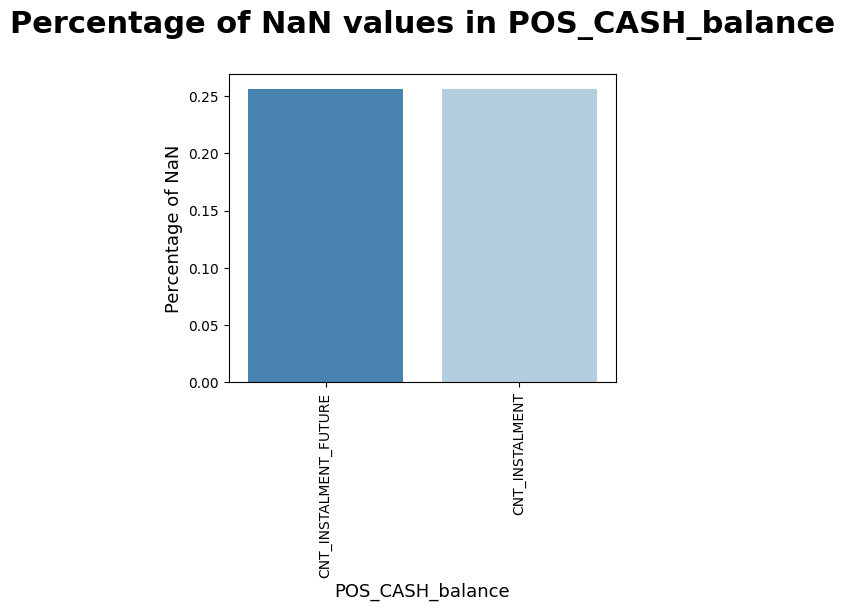

In [17]:
plot_nan_percent(nan_pos, 'POS_CASH_balance', tight_layout = False, figsize = (5,4))

## Observations 3

1. **Presence of NaN Values:**  
   Among the 8 columns in the `POS_CASH_balance` dataset, only two columns contain missing values (`NaN`):
   - **Counts of Installments Remaining**
   - **Term of the Loan**

2. **Minimal Impact of Missing Data:**  
   The proportion of missing values in these columns is extremely low, accounting for only **0.256%**. This minimal level of missingness is unlikely to significantly affect the dataset's overall quality or analysis.

**Recommendation:** Given the low proportion of `NaN` values, these can be handled effectively by imputation methods (e.g., mean or median substitution) or by removing the affected rows, depending on the analysis context.


# 5. Checking categorical columns

In [18]:

def get_category_columns(data):
    """
    Returns a DataFrame with details about categorical columns, including unique value counts and NaN percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing feature names, unique counts, and NaN percentages.
    """
    category_columns = data.select_dtypes(include='object').columns
    column_info = pd.DataFrame({
        'Feature': category_columns,
        'Nunique': [data[col].nunique() for col in category_columns],
        'Percentage_of_NaN': [data[col].isnull().mean() * 100 for col in category_columns]
    }).sort_values(by='Percentage_of_NaN', ascending=False)
    return column_info

def plot_category_summary(data, name, figsize=(12, 8)):
    """
    Plots the number of unique values for categorical columns.

    Parameters:
        data (pd.DataFrame): The categorical column summary DataFrame.
        name (str): The dataset name.
        figsize (tuple): Figure size for the plot.
    """
    data = data.sort_values(by='Nunique', ascending=False)
    plt.figure(figsize=figsize)
    sns.barplot(x='Nunique', y='Feature', data=data, palette='Blues_r')
    plt.title(f'Unique Value Counts in Categorical Columns - {name}', fontsize=18, weight='bold')
    plt.xlabel('Number of Unique Values')
    plt.ylabel('Categorical Columns')
    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(data, column_name, figsize=(18, 6), show_percentage=True, rotation=0):
    """
    Plots the distribution of a categorical variable and optionally shows percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the categorical column to plot.
        figsize (tuple): Size of the plot figure.
        show_percentage (bool): Whether to display percentages on the bars.
        rotation (int): Degree of rotation for x-tick labels.
    """
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=value_counts.index, y=value_counts, palette='Blues_r')
    plt.title(f'Distribution of {column_name}', fontsize=18, weight='bold')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=rotation)

    if show_percentage:
        total = value_counts.sum()
        for i, count in enumerate(value_counts):
            plt.text(i, count + 0.02 * total, f'{(count / total) * 100:.1f}%', ha='center', fontsize='small')

    plt.tight_layout()
    plt.show()

def plot_defaulter_comparison(data, x):
    """
    Plots pie charts for distribution of a categorical variable by default status.

    Parameters:
        data (pd.DataFrame): The input DataFrame with a "TARGET" column.
        column_name (str): Name of the categorical column to plot.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    x1 = data[data["TARGET"] == 0][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[0].pie(x1, labels=x1.index, autopct='%1.1f%%')
    ax[0].title.set_text("Non-defaulter")

    x2 = data[data["TARGET"] == 1][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[1].pie(x2, labels=x2.index, autopct='%1.1f%%')
    ax[1].title.set_text("Defaulter")

    ax[1].legend(loc='upper right', bbox_to_anchor=(1.5, 1), title=x)

    for i in range(2):
        for text in ax[i].texts[::2]:
            text.set_visible(False)

    fig.suptitle(f"Distribution of {x}\nwith TARGET", fontsize=20)

    fig.tight_layout()
    plt.tight_layout()
    plt.show()


def print_unique_categories(data, column_name, show_counts=False):
    """
    Prints unique categories of a column and optionally their counts.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column to analyze.
        show_counts (bool): Whether to display counts for each category.
    """
    unique_values = data[column_name].unique()
    print(f"Unique categories in '{column_name}': {unique_values}")

    if show_counts:
        counts = data[column_name].value_counts()
        print(f"\nCounts for each category in '{column_name}':\n{counts}")


In [19]:
cate_pc = get_category_columns(pos_cash)
cate_pc

,Feature,Nunique,Percentage_of_NaN
0,NAME_CONTRACT_STATUS,9,0.0


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


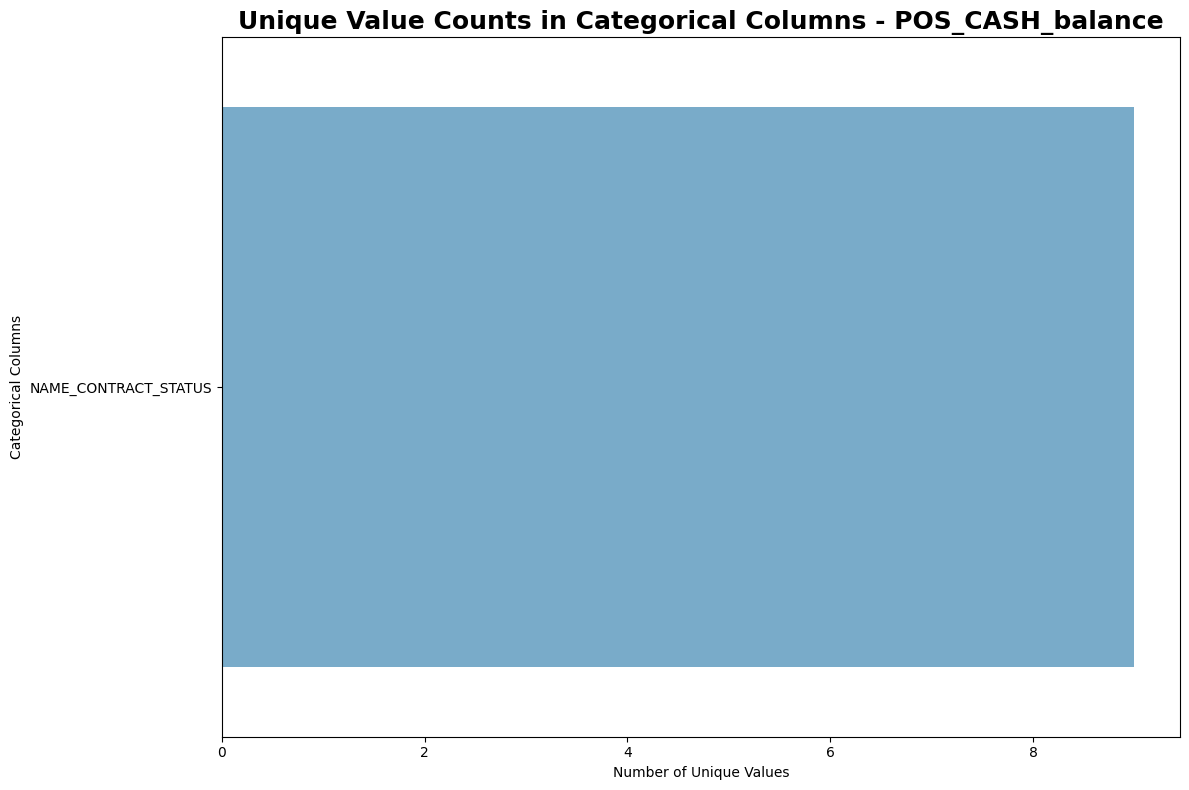

In [20]:
plot_category_summary(cate_pc, 'POS_CASH_balance')

## Observations 4

**Feature:** `NAME_CONTRACT_STATUS`

- **Number of Unique Values (Nunique):** 9  
- **Percentage of Missing Values (NaN):** 0.0%  

**Insights:**  
1. The absence of missing values in this column (0.0% NaN) simplifies preprocessing, as no imputation or removal of rows is required.  
2. With nine unique values, this feature is likely categorical, representing various contract status categories.  

**Recommendation:**  
Ensure appropriate encoding of this categorical feature (e.g., one-hot encoding or label encoding) for machine learning models if required.
 context.


# 6.EDA

## 6.1. Correlation

In [21]:

class CorrelationMatrix:
    def __init__(self, data, columns_to_drop=None, figsize=(25, 23), mask_upper=True, linewidth=0.5, fontsize=10, cmap='Blues'):
        self.data = data
        self.columns_to_drop = columns_to_drop if columns_to_drop else []
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap
        self.corr_data = None

    def plot_correlation_matrix(self, round_decimals=2):
        """Plots the correlation matrix heatmap."""
        data = self.data.drop(self.columns_to_drop + ['TARGET'], axis=1, errors='ignore')
        self.corr_data = data.corr(numeric_only=True)

        # Create mask for upper triangle
        mask = None
        if self.mask_upper:
            mask = np.triu(np.ones_like(self.corr_data, dtype=bool))

        # Plot heatmap
        plt.figure(figsize=self.figsize)
        sns.heatmap(
            self.corr_data.round(round_decimals),
            annot=True,
            mask=mask,
            cmap=self.cmap,
            linewidths=self.linewidth,
            fmt=f".{round_decimals}f"
        )
        plt.xticks(rotation=90, fontsize=self.fontsize)
        plt.yticks(fontsize=self.fontsize)
        plt.title("Correlation Heatmap for Numerical Features", size=20, weight='bold', pad=20)
        plt.tight_layout()
        plt.show()

    def target_top_corr(self, target_top_columns=10):
        """Returns the top correlated features with the target."""
        if 'TARGET' not in self.data:
            raise ValueError("Target column not found in data.")

        # Calculate correlations with target
        target_corr = self.data.corr(numeric_only=True)['TARGET']
        top_corr = target_corr.abs().sort_values(ascending=False).iloc[1:target_top_columns+1]
        top_corr_df = pd.DataFrame({'Feature': top_corr.index, 'Correlation': top_corr.values})

        return top_corr_df


def numeric_cor(data, round_decimals=2):
    """Plots the correlation of numerical features."""
    numeric_df = data.select_dtypes(include='number')
    numeric_df_corr = numeric_df.corr()

    plt.figure(figsize=(10, 10))
    mask = np.triu(np.ones_like(numeric_df_corr, dtype=bool))
    sns.heatmap(
        numeric_df_corr.round(round_decimals),
        annot=True,
        mask=mask,
        cmap='Blues',
        linewidth=0.5,
        fmt=f".{round_decimals}f"
    )
    plt.title("Correlation of Numerical Features", fontsize=20, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()


def plot_phik_matrix(data, categorical_columns, figsize=(20, 20), mask_upper=True, linewidth=0.5, fontsize=10, cmap='Blues', show_target_top_corr=True, target_top_columns=10, round_decimals=2):
    """Plots the Phi-K correlation matrix for categorical features."""
    # Calculate Phi-K correlation
    data_for_phik = data[categorical_columns].astype(str)
    phik_corr = data_for_phik.phik_matrix()

    # Create mask
    mask = None
    if mask_upper:
        mask = np.triu(np.ones_like(phik_corr, dtype=bool))

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        phik_corr.round(round_decimals),
        annot=True,
        mask=mask,
        cmap=cmap,
        linewidths=linewidth,
        fmt=f".{round_decimals}f"
    )
    plt.title("Phi-K Correlation Heatmap for Categorical Features", fontsize=20, weight='bold', pad=20)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()

    # Display top correlations with target
    if show_target_top_corr and 'TARGET' in data.columns:
        phik_target = phik_corr['TARGET'].sort_values(ascending=False).iloc[1:target_top_columns+1]
        top_corr_df = pd.DataFrame({'Feature': phik_target.index, 'Phi-K Correlation': phik_target.values})
        print("Top correlated features with TARGET:")
        display(top_corr_df)


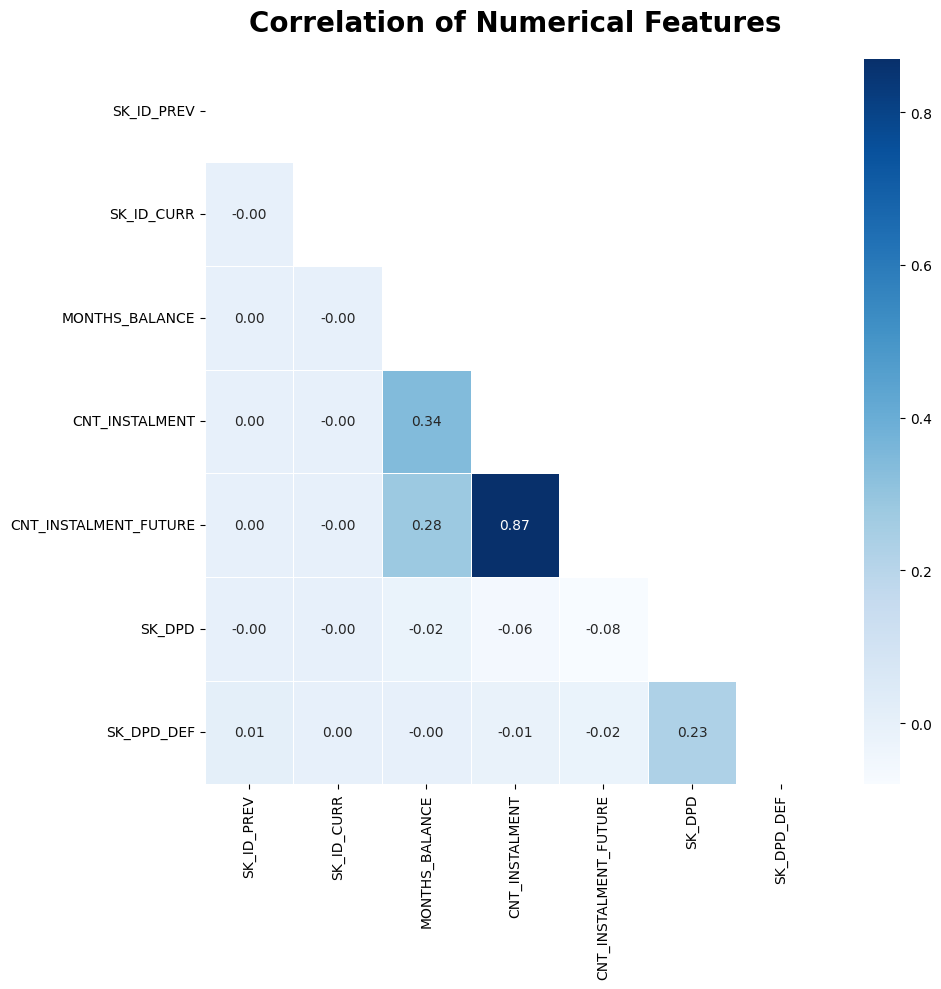

In [22]:
numeric_cor(pos_cash)

**merge with application_train**

In [23]:
pos_cash_merged = pd.merge(application_train[['SK_ID_CURR','TARGET']], pos_cash, how = 'left', on=['SK_ID_CURR'])
pos_cash_merged.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,278621,0,2396755.0,-66.0,12.0,1.0,Active,0.0,0.0
1,278621,0,2636178.0,-23.0,6.0,1.0,Active,0.0,0.0
2,278621,0,1810518.0,-23.0,12.0,10.0,Active,0.0,0.0
3,278621,0,1810518.0,-25.0,12.0,12.0,Active,0.0,0.0
4,278621,0,2396755.0,-67.0,12.0,2.0,Active,0.0,0.0


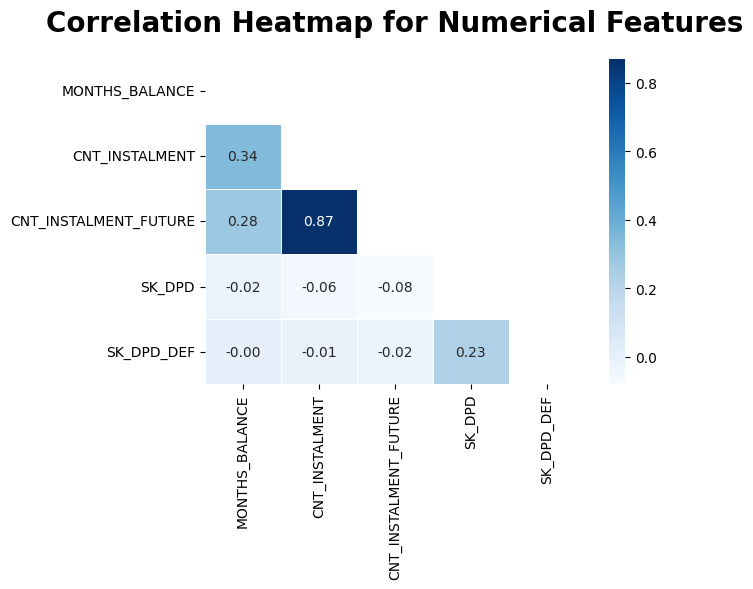

In [24]:
corr_ma = CorrelationMatrix(pos_cash_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (7,6))
corr_ma.plot_correlation_matrix()

In [25]:
top_corr_target_df = corr_ma.target_top_corr()
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)


Columns with highest values of Phik-correlation with Target Variable are:


,Feature,Correlation
0,CNT_INSTALMENT_FUTURE,0.021500
1,MONTHS_BALANCE,0.019416
2,CNT_INSTALMENT,0.017968
3,SK_DPD,0.006454
4,SK_DPD_DEF,0.005827
5,SK_ID_CURR,0.002389
6,SK_ID_PREV,0.000119


### Observations 5

<ol>
    <li>The above heatmap shows the correlation betweenreehea fetures</li>
    <li>From the heatmap of correlation matrix, we one set of moderately correlated features, which are: CNT_INSTALMENT and CNT_INSTALMENT_FUTURE.</li>
    <li>The correlation of features with Target is very low, this shows the absence of a linear relationship between the feature and the target variable.</li></ol>

## 6.2. Plotting Continuous Variables

In [26]:

def plot_continuous_variables(data, column_name, plots=['distplot', 'CDF', 'box', 'violin'],
                              scale_limits=None, figsize=(20, 8), hist=False, log_scale=False):
    '''
    Function to plot continuous variables distribution

    Inputs:
        data: DataFrame
            The DataFrame from which to plot.
        column_name: str
            Column's name whose distribution is to be plotted.
        plots: list, default = ['distplot', 'CDF', 'box', 'violin']
            List of plots to plot for Continuous Variable.
        scale_limits: tuple (left, right), default = None
            To control the limits of values to be plotted in case of outliers.
        figsize: tuple, default = (20,8)
            Size of the figure to be plotted.
        hist: bool, default = False
            Whether to plot histogram along with distplot or not.
        log_scale: bool, default = False
            Whether to use log-scale for variables with outlying points.
    '''

    # Filter the data if scale limits are provided
    if scale_limits:
        data = data[(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize=figsize)

    for i, plot_type in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)

        # Plot CDF
        if plot_type == 'CDF':
            # Ensure TARGET exists in data
            if 'TARGET' in data.columns:
                percentile_values_0 = data[data['TARGET'] == 0].sort_values(by=column_name).dropna()
                percentile_values_0['Percentile'] = np.linspace(0, 1, len(percentile_values_0))

                percentile_values_1 = data[data['TARGET'] == 1].sort_values(by=column_name).dropna()
                percentile_values_1['Percentile'] = np.linspace(0, 1, len(percentile_values_1))

                plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color='red', label='Non-Defaulters')
                plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color='black', label='Defaulters')
                plt.xlabel(column_name)
                plt.ylabel('Probability')
                plt.title(f'CDF of {column_name}', size=25, weight='bold', pad=28)
                plt.legend(fontsize='medium')

                if log_scale:
                    plt.xscale('log')
                    plt.xlabel(column_name + ' - (log-scale)')

        # Plot Distplot (now using histplot and kdeplot)
        if plot_type == 'distplot':
            sns.histplot(data=data, x=column_name, kde=True, hue='TARGET', multiple='stack', color=['red', 'black'],
                         label=['Non-Defaulters', 'Defaulters'], element='step', stat='density', common_norm=False)
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title(f"Dist-Plot of {column_name}", size=25, weight='bold', pad=28)

            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (Log Scale)')

        # Violin plot
        if plot_type == 'violin':
            sns.violinplot(x='TARGET', y=column_name, data=data, inner='quart')
            plt.title(f"Violin-Plot of {column_name}", size=25, weight='bold', pad=28)

            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (Log Scale)')

        # Box plot
        if plot_type == 'box':
            sns.boxplot(x='TARGET', y=column_name, data=data)
            plt.title(f"Box-Plot of {column_name}", size=25, weight='bold', pad=28)

            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (Log Scale)')

    plt.tight_layout()
    plt.show()


In [27]:
pos_cash_merged_numeric = pos_cash_merged.groupby('SK_ID_PREV').agg('mean', numeric_only = True)
pos_cash_merged_numeric.head()

,SK_ID_CURR,TARGET,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,
1000001.0,117953.0,0.0,-9.0,8.666667,7.666667,0.0,0.0
1000003.0,6707.0,0.0,-2.5,12.000000,10.500000,0.0,0.0
1000005.0,83759.0,0.0,-51.0,10.000000,5.000000,0.0,0.0
1000008.0,185554.0,0.0,-38.5,9.900000,5.400000,0.0,0.0
1000011.0,268838.0,0.0,-9.0,12.000000,6.000000,0.0,0.0


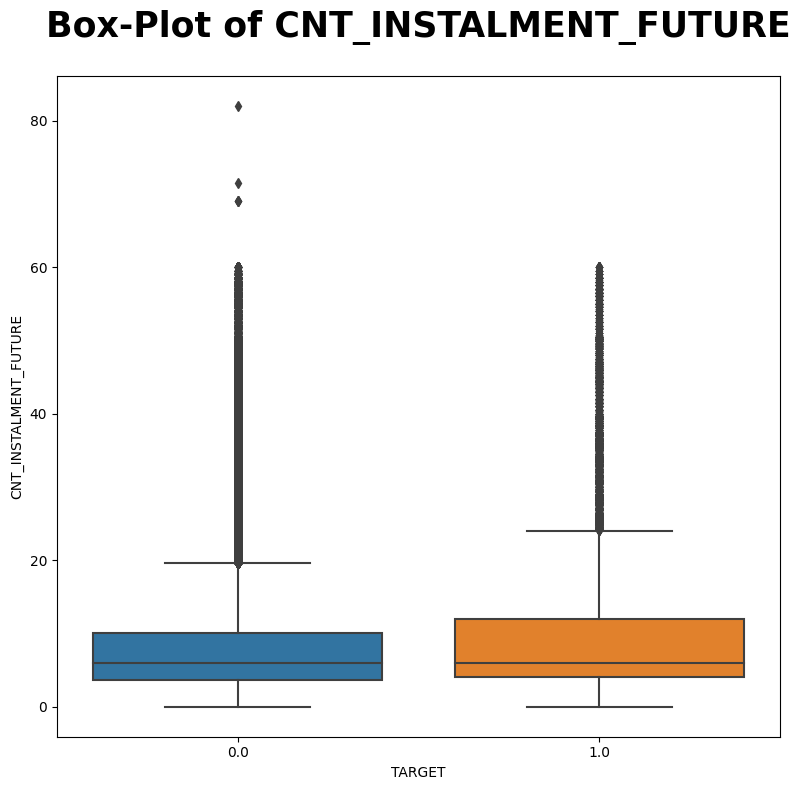

In [28]:
plot_continuous_variables(pos_cash_merged_numeric, 'CNT_INSTALMENT_FUTURE', plots = ['box'], figsize = (8,8))

### Observations 6
At the above box-plot for CNT_INSTALMENT_FUTURE, we see that the percentile values > 50% for Defaulters (TARGET =1) are usually higher than those of Non-Defaulters (TARGET = 0). \
Even the upper limit whisker for Defaulters is higher than that of Non-Defaulters. This suggests that the Defaulters tend to have more number of Installments remaining on their previous credits as compared to Non-Defaulters.

## 6.3. Distribution

In [29]:
def plot_distribution(data, column_name, column_name2=None,
                      plot_type='dist', nrows=1, ncols=2,
                      figsize=(12, 6), dropna=False,
                      sort_values=False, bins='auto', palette='Blues_r'):
    """
    Function to plot the distribution of a variable related to a target variable.
    """
    if plot_type == 'scatter' and column_name2 is None:
        raise ValueError("You must provide `column_name2` for scatter plots.")
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()

    if dropna:
        data = data.dropna(subset=[column_name, column_name2] if column_name2 else [column_name])
    if sort_values:
        data = data.sort_values(by=column_name)

    targets = data['TARGET'].unique()
    for i, target in enumerate(targets):
        subset = data[data['TARGET'] == target]
        title = f"Target = {target}"
        
        if plot_type == 'dist':
            sns.histplot(subset[column_name], bins=bins, kde=True, ax=ax[i])
        elif plot_type == 'hist':
            sns.histplot(subset[column_name], bins=bins, kde=False, ax=ax[i])
        elif plot_type == 'count':
            sns.countplot(x=subset[column_name], ax=ax[i], palette=palette)
        elif plot_type == 'box':
            sns.boxplot(x=subset[column_name], ax=ax[i], orient='h')
        elif plot_type == 'scatter':
            sns.scatterplot(
                x=subset[column_name],
                y=subset[column_name2],
                ax=ax[i],
                color="blue" if target == 0 else "orange"  # Assign colors manually
            )

        ax[i].set_title(title)
        ax[i].tick_params(axis='x', rotation=45)

    fig.tight_layout()
    plt.show()


In [30]:
pos_cash_merged_numeric.columns

Index(['SK_ID_CURR', 'TARGET', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

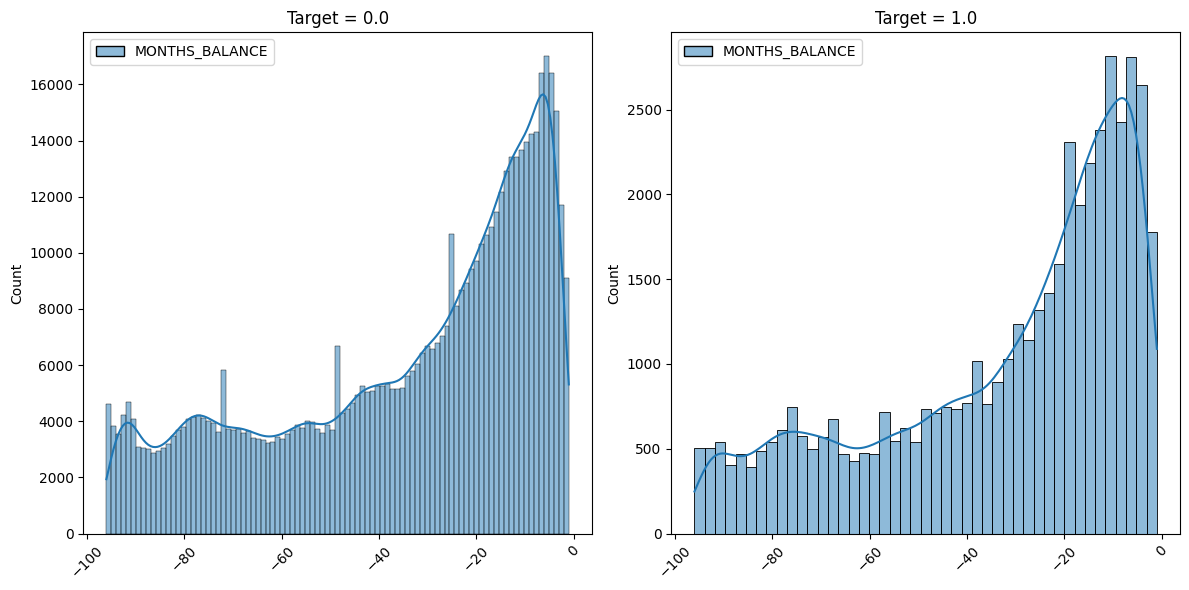

In [31]:
plot_distribution(pos_cash_merged_numeric, ['MONTHS_BALANCE'])

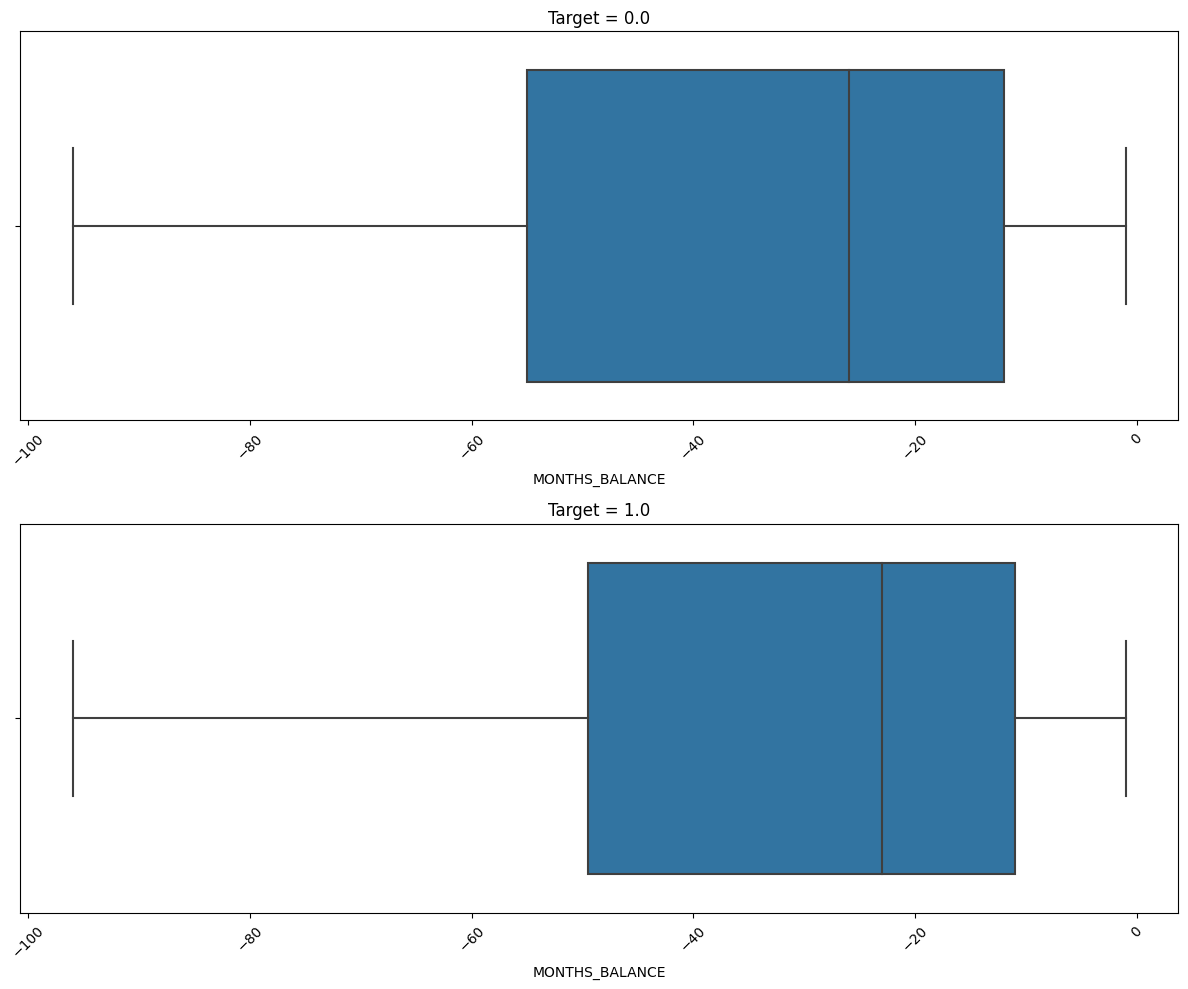

In [32]:
plot_distribution(data = pos_cash_merged_numeric, column_name='MONTHS_BALANCE', plot_type='box', figsize=(12,10), nrows=2, ncols=1, dropna=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

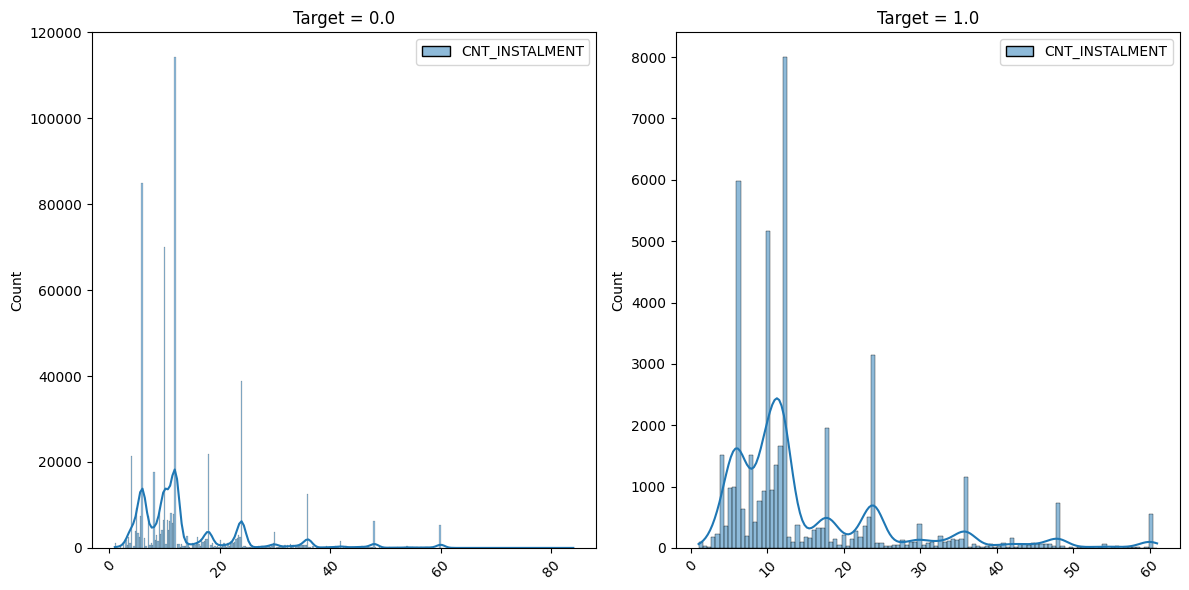

In [33]:
plot_distribution(pos_cash_merged_numeric, ['CNT_INSTALMENT'])

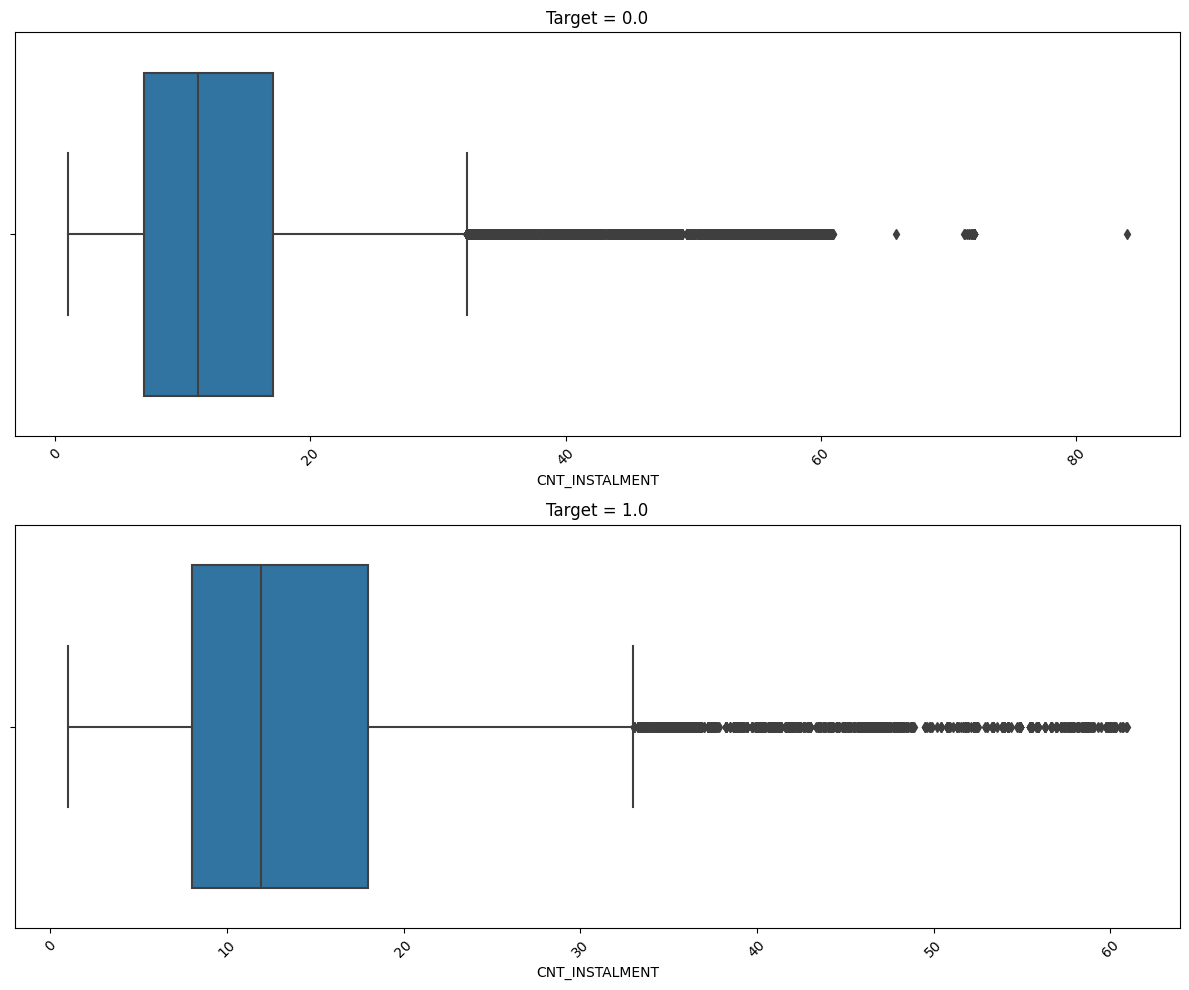

In [34]:
plot_distribution(data = pos_cash_merged_numeric, column_name='CNT_INSTALMENT', plot_type='box', figsize=(12,10), nrows=2, ncols=1, dropna=False)

The box plots illustrate the distribution of `CNT_INSTALMENT` for `Target = 0.0` and `Target = 1.0`. The `Target = 0.0` group shows a wider spread with more extreme outliers, while the `Target = 1.0` group has a tighter distribution with fewer outliers. Both groups have similar medians, suggesting comparable central tendencies, but the higher variability in `Target = 0.0` might reflect different financial behaviors or risks.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


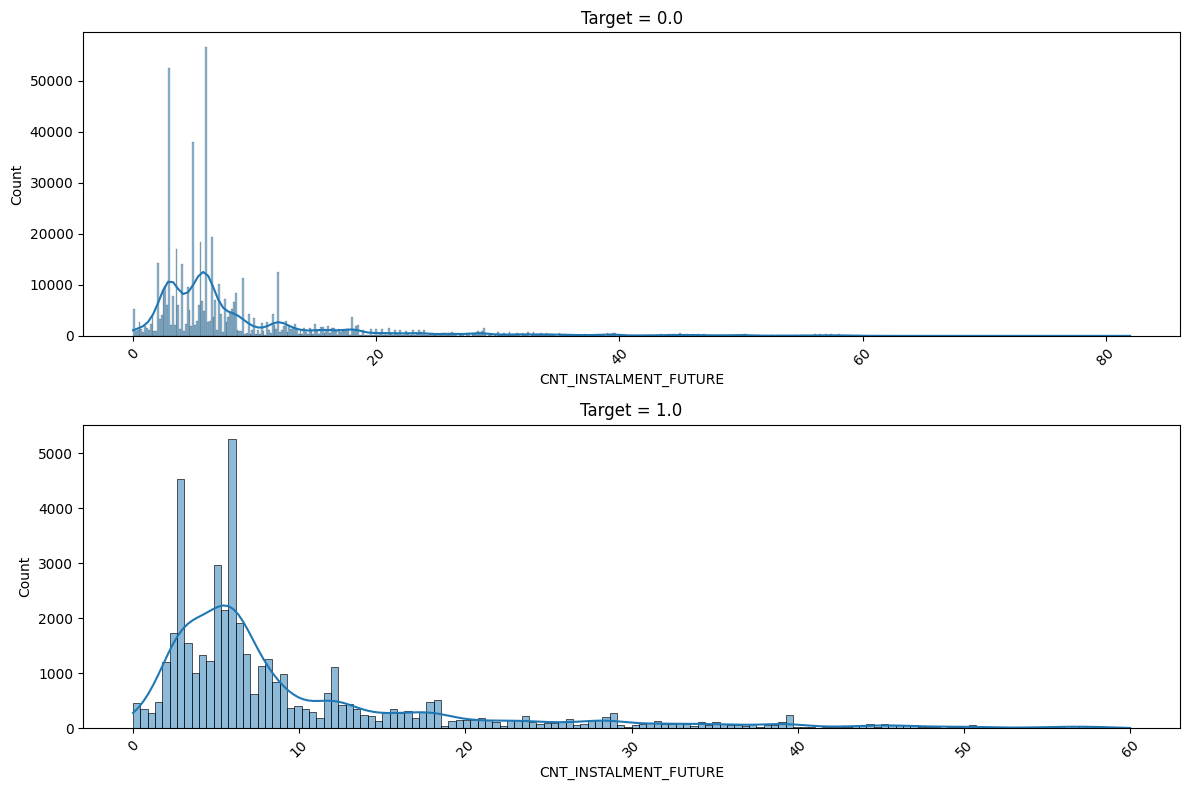

In [35]:
plot_distribution(data = pos_cash_merged_numeric, column_name='CNT_INSTALMENT_FUTURE', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

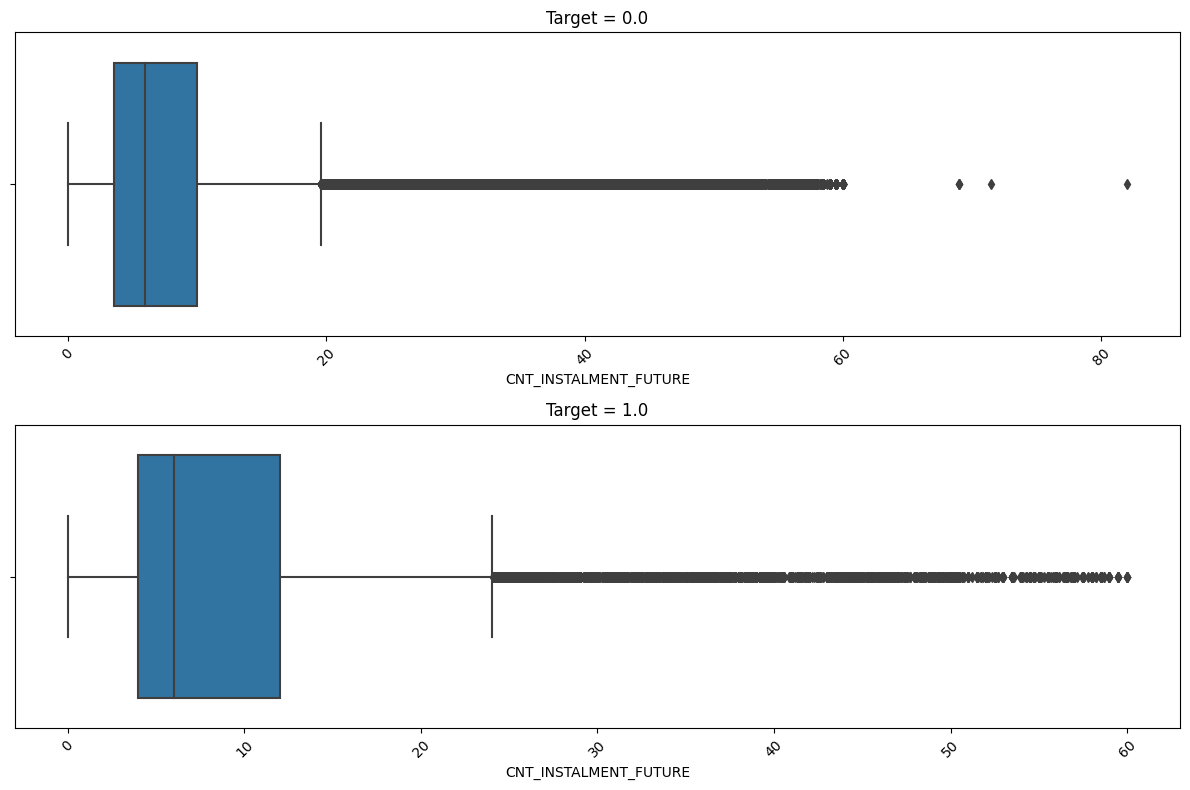

In [36]:
plot_distribution(data = pos_cash_merged_numeric, column_name='CNT_INSTALMENT_FUTURE', plot_type='box', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

### SK_SPD
- DPD (days past due) during the month of previous credit: DPD (số ngày quá hạn) trong tháng của khoản vay trước đó

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


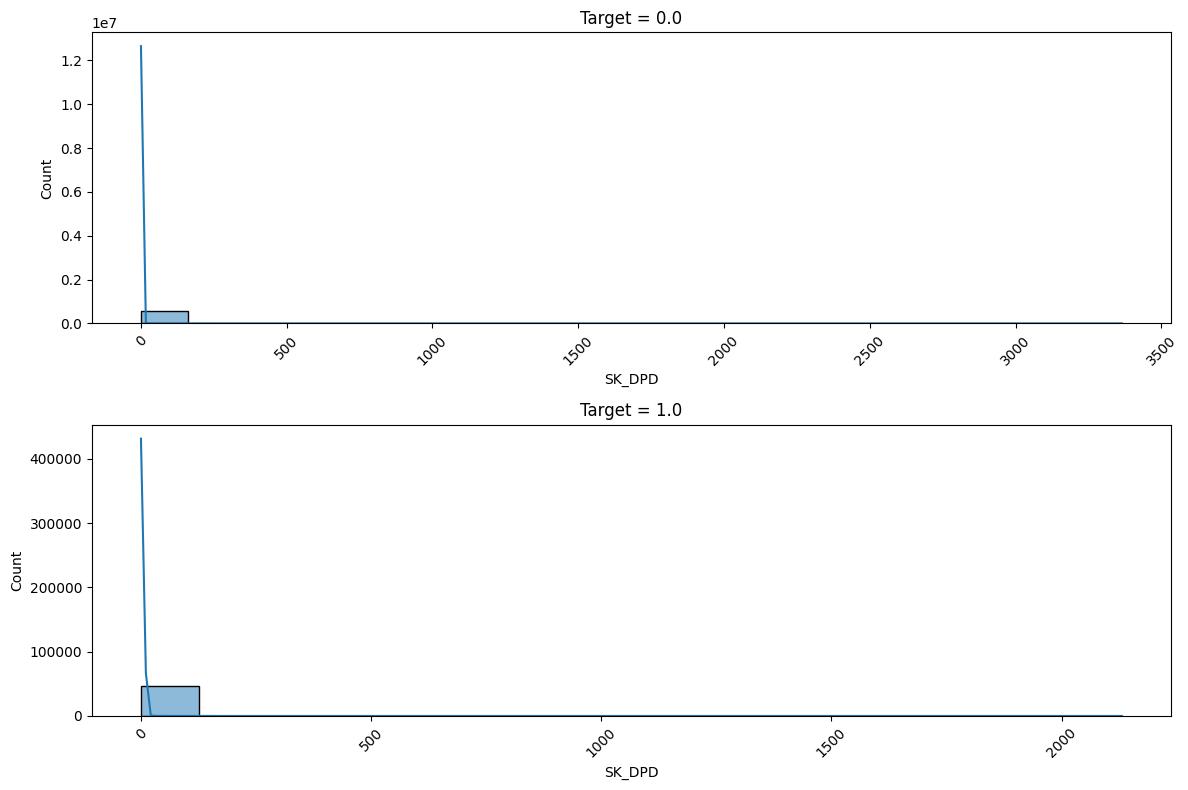

In [37]:
plot_distribution(data = pos_cash_merged_numeric, column_name='SK_DPD', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

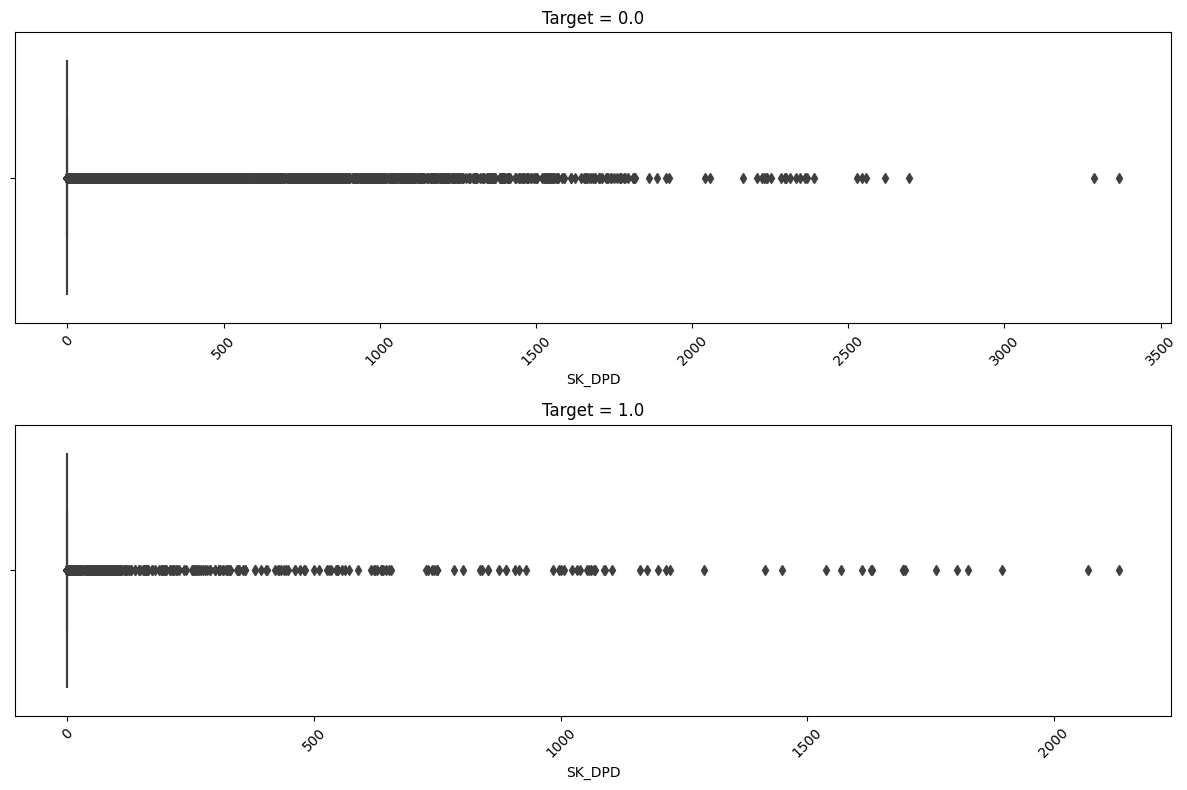

In [38]:
plot_distribution(data = pos_cash_merged_numeric, column_name='SK_DPD', plot_type='box', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

DPD (days past due) during the month of previous credi have a larger ranges of value for these havinng TARGET = 0 than those with TARGET = 1

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


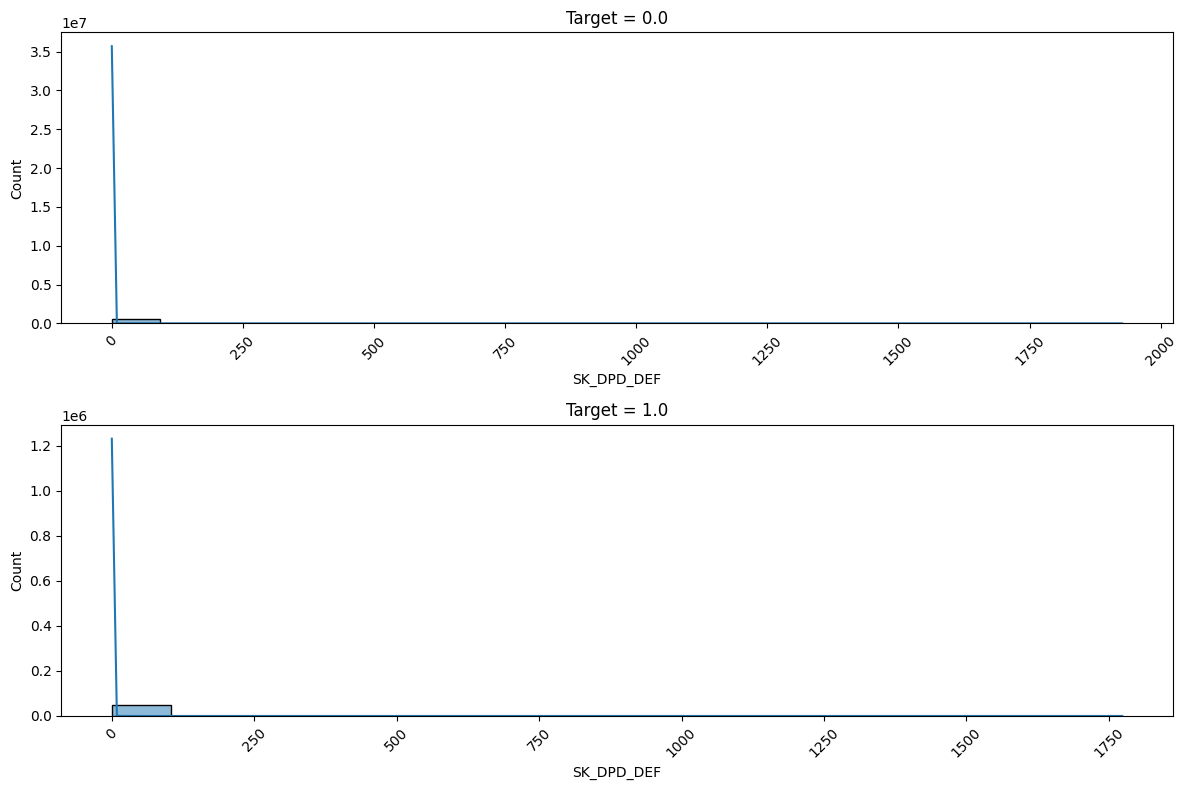

In [39]:
plot_distribution(data = pos_cash_merged_numeric, column_name='SK_DPD_DEF', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

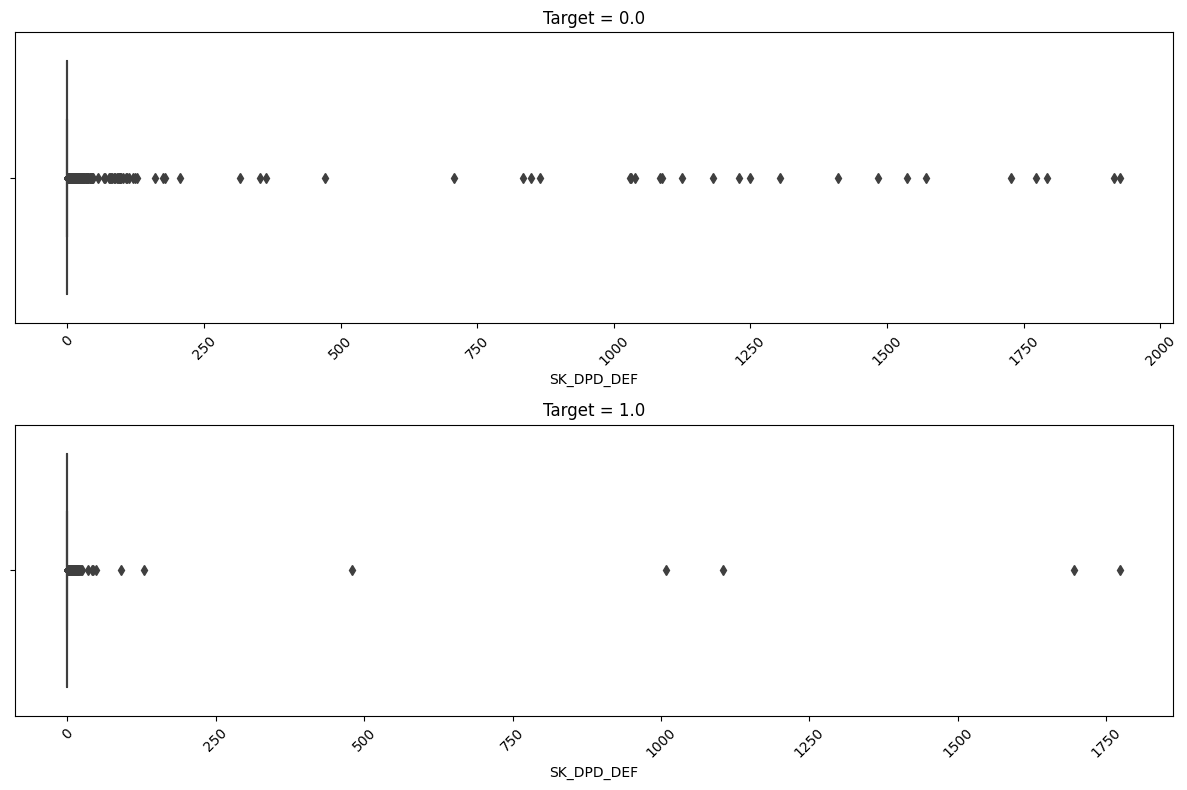

In [40]:
plot_distribution(data = pos_cash_merged_numeric, column_name='SK_DPD_DEF', plot_type='box', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

SK_DPD_DEF: DPD trong tháng với sự chấp nhận (tolerant DPD) của khoản vay trước đó

In [41]:
pos_cash_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'MONTHS_BALANCE',
       'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS',
       'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

In [42]:
pos_cash_merged["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

NAME_CONTRACT_STATUS
Active                   91.538649
Completed                 7.411763
Signed                    0.870035
Demand                    0.071763
Returned to the store     0.053061
Approved                  0.049212
Amortized debt            0.005341
Canceled                  0.000161
XNA                       0.000015
Name: proportion, dtype: float64

In [43]:
def defaulter_percentage_count_per_cat(df, col):
    """
    Calculates the percentage of defaulters for each category in a column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        col (str): The column to compute defaulter percentages for.

    Returns:
        pd.DataFrame: DataFrame with categories and their corresponding defaulter percentages.
    """
    if col not in df.columns or "TARGET" not in df.columns:
        print(f"Column '{col}' or 'TARGET' is missing in the dataset.")
        return pd.DataFrame()
    
    if df.empty:
        print("The DataFrame is empty.")
        return pd.DataFrame()
    
    grouped = df.groupby(col)['TARGET'].agg(['sum', 'count']).reset_index()
    grouped.columns = ['Categories', 'Default_Count', 'Total_Count']
    grouped['Percentage_Of_Default'] = (grouped['Default_Count'] / grouped['Total_Count']) * 100
    return grouped
    return grouped[['Categories', 'Percentage_Of_Default']].sort_values(by='Percentage_Of_Default', ascending=False)

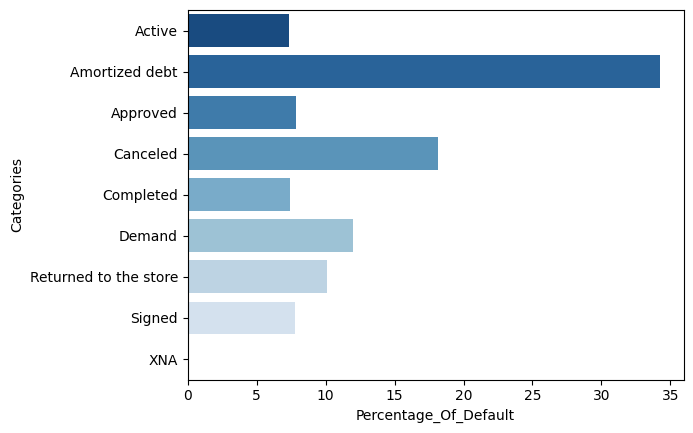

In [44]:
df = defaulter_percentage_count_per_cat(pos_cash_merged, "NAME_CONTRACT_STATUS")
sns.barplot(data= df, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## Amortized has the highest debt ratio

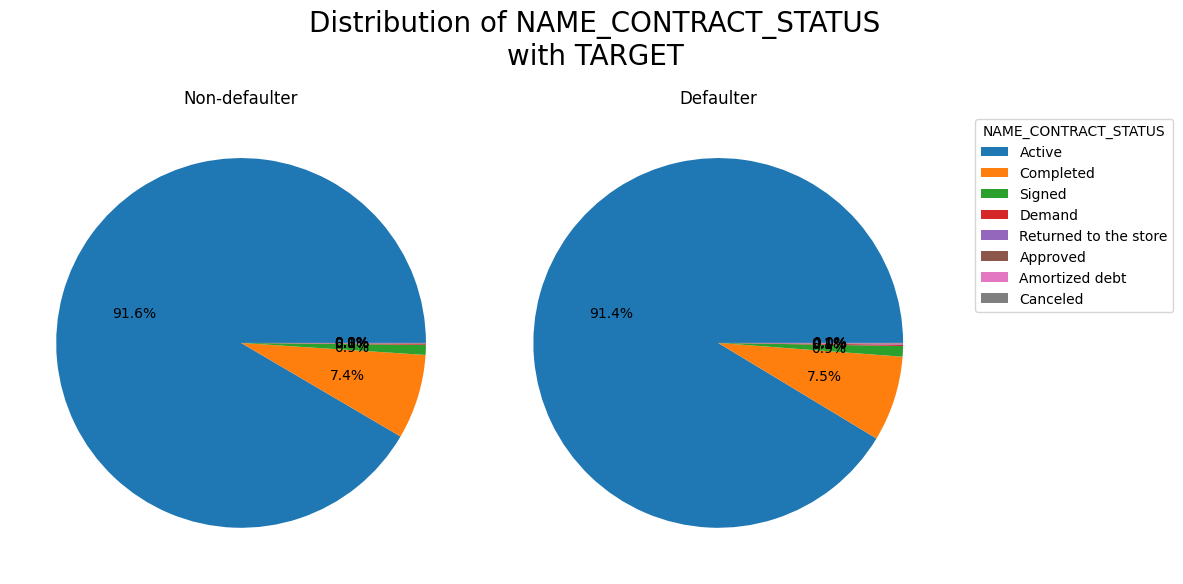

In [45]:
plot_defaulter_comparison(pos_cash_merged, "NAME_CONTRACT_STATUS")

In [46]:
pos_cash_filter = pos_cash.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
pos_cash_filter.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,1231213,-1,12.0,12.0,Active,0,0
1,0,1716062,-5,2.0,0.0,Completed,0,0
2,0,1891354,-1,3.0,0.0,Completed,0,0
3,0,2665996,-10,5.0,0.0,Completed,0,0
4,1,1847729,-43,10.0,0.0,Completed,0,0


In [48]:
pos_cash_filter["Completed_Flag"] = pos_cash_filter["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
pos_cash_filter["Completed_Count"] = pos_cash_filter.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
pos_cash_filter.drop(["Completed_Flag"], axis=1, inplace= True)
pos_cash_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,0,1231213,-1,12.0,12.0,Active,0,0,3
1,0,1716062,-5,2.0,0.0,Completed,0,0,3
2,0,1891354,-1,3.0,0.0,Completed,0,0,3
3,0,2665996,-10,5.0,0.0,Completed,0,0,3
4,1,1847729,-43,10.0,0.0,Completed,0,0,2
...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,2
800333,307508,1978855,-64,12.0,1.0,Active,0,0,2
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,2
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,2


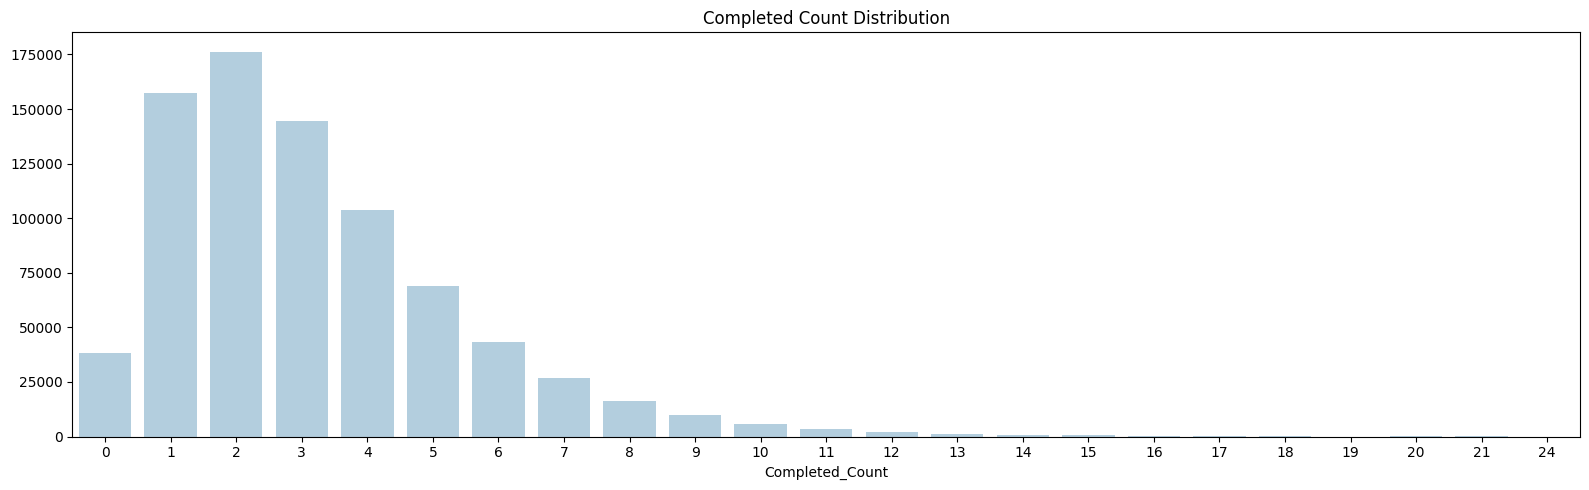

In [49]:
completed_count_SK = pos_cash_filter.groupby(["Completed_Count"]).size()
plt.figure(figsize=(16,5))
sns.set_palette("Blues_d", len(pos_cash_filter))
sns.barplot(x=  completed_count_SK.index , y= completed_count_SK.values)
plt.title("Completed Count Distribution")
plt.tight_layout()
plt.show()

The number of completed loans which have the highest count is 2. The previous contract status can affect the number of completed contracts

In [50]:
def overdue_flag(x):
    if x['SK_DPD_DEF'] > 0 and x['CNT_INSTALMENT_FUTURE'] > 0:
        return 1
    else:
        return 0

pos_cash_filter["Overdue_flag"] = pos_cash_filter.apply(overdue_flag, axis= 1)
pos_cash_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count,Overdue_flag
0,0,1231213,-1,12.0,12.0,Active,0,0,3,0
1,0,1716062,-5,2.0,0.0,Completed,0,0,3,0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3,0
3,0,2665996,-10,5.0,0.0,Completed,0,0,3,0
4,1,1847729,-43,10.0,0.0,Completed,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,2,0
800333,307508,1978855,-64,12.0,1.0,Active,0,0,2,0
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,2,0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,2,0


In [51]:
pos_cash_filter["Overdue_Count"] = pos_cash_filter.groupby(["SK_ID_CURR"])["Overdue_flag"].transform("sum")
pos_cash_filter.drop(["Overdue_flag"], axis= 1, inplace= True)
pos_cash_filter.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count,Overdue_Count
0,0,1231213,-1,12.0,12.0,Active,0,0,3,0
1,0,1716062,-5,2.0,0.0,Completed,0,0,3,0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3,0
3,0,2665996,-10,5.0,0.0,Completed,0,0,3,0
4,1,1847729,-43,10.0,0.0,Completed,0,0,2,0


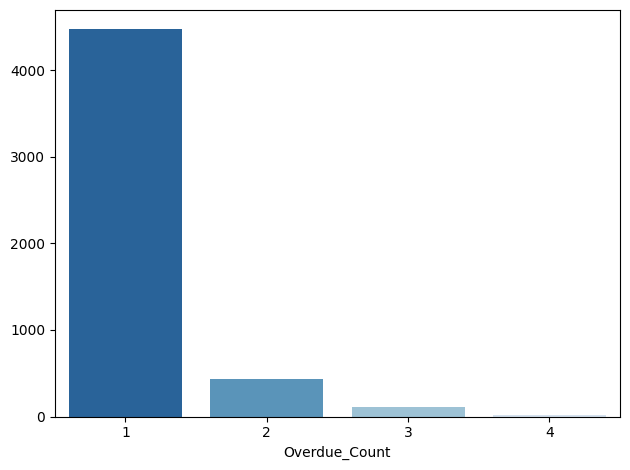

In [52]:
overdue_count_SK = pos_cash_filter.groupby(["Overdue_Count"]).size()[1:]
sns.barplot(x= overdue_count_SK.index , y= overdue_count_SK.values, palette="Blues_r")

plt.tight_layout()
plt.show()

In [53]:
pf_final = pos_cash_filter.groupby('SK_ID_CURR').first()[["Completed_Count","Overdue_Count"]]
pf_final

,Completed_Count,Overdue_Count
SK_ID_CURR,,
0,3,0
1,2,0
2,3,0
3,3,0
4,0,0
...,...,...
307505,2,0
307506,4,0
307508,2,0


<Axes: xlabel='Completed_Count', ylabel='Overdue_Count'>

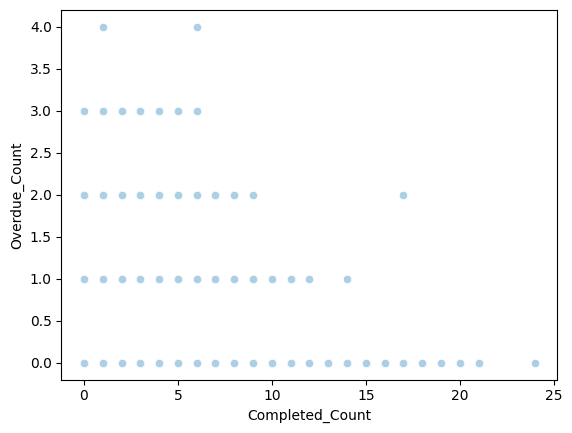

In [63]:
sns.scatterplot(data = pf_final, x= 'Completed_Count', y='Overdue_Count')


In [ ]:
The more number of completed contracts, the less overdue contracts that a person could have

### Observations 7
**1. Imbalance Ratios:**
- 'CNT_INSTALMENT_FUTURE' has a moderate imbalance ratio of 0.4315.
- Other columns, such as 'NAME_CONTRACT_STATUS,' 'SK_DPD,' and 'SK_DPD_DEF,' have low imbalance ratios ranging from 0.0000 to 0.0023.

**2. Outliers:**
- No specific outlier information is provided for columns such as 'MONTHS_BALANCE,' 'CNT_INSTALMENT,' and 'CNT_INSTALMENT_FUTURE.'
- Columns 'SK_DPD' and 'SK_DPD_DEF' have many outliers.\
**3. Category Columns:**
- The 'NAME_CONTRACT_STATUS' feature has nine unique values, suggesting it is a categorical variable.
- There are no missing values (NaN) in the 'NAME_CONTRACT_STATUS' column.
